In [ ]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# EDA

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Cleaning

In [ ]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
print(df.duplicated().sum())

3854


In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


## Data Visualization

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Statistik deskriptif untuk setiap kolom
print(df.describe())

# Perhitungan mean untuk setiap kolom
print(df.mean())

# Perhitungan median untuk setiap kolom
print(df.median())

# Perhitungan modus untuk setiap kolom
print(df.mode())

# Perhitungan persentil untuk setiap kolom
print(df.quantile([0.25, 0.50, 0.75]))

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50%             140.0

<ipython-input-8-42f830788a6b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())
<ipython-input-8-42f830788a6b>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())
<ipython-input-8-42f830788a6b>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.quantile([0.25, 0.50, 0.75]))


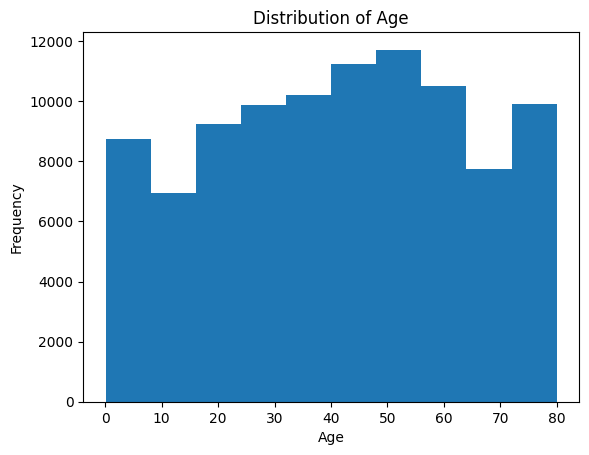

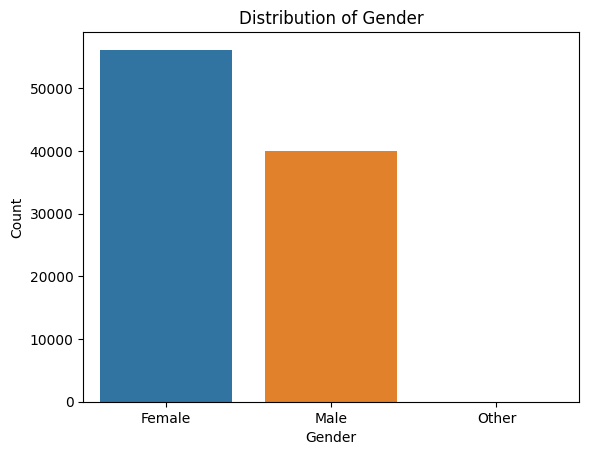

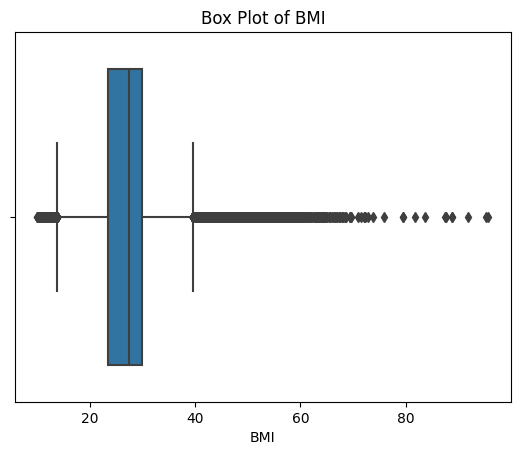

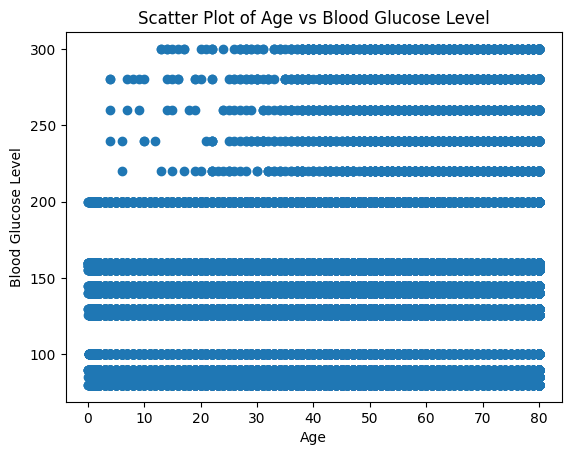

In [ ]:
# Histogram untuk kolom 'age'
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Diagram batang untuk kolom 'gender'
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# Box plot untuk kolom 'bmi'
sns.boxplot(x='bmi', data=df)
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()

# Scatter plot untuk kolom 'age' dan 'blood_glucose_level'
plt.scatter(df['age'], df['blood_glucose_level'])
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot of Age vs Blood Glucose Level')
plt.show()

<ipython-input-10-8309ffba0e9d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


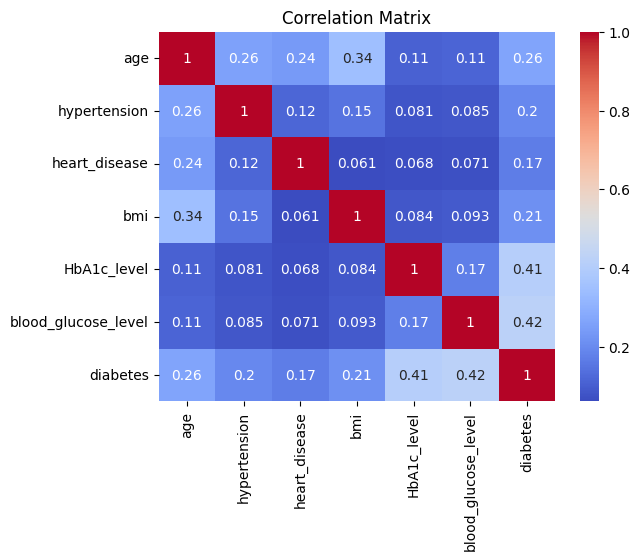

In [ ]:
# Korelasi Pearson antara variabel numerik
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

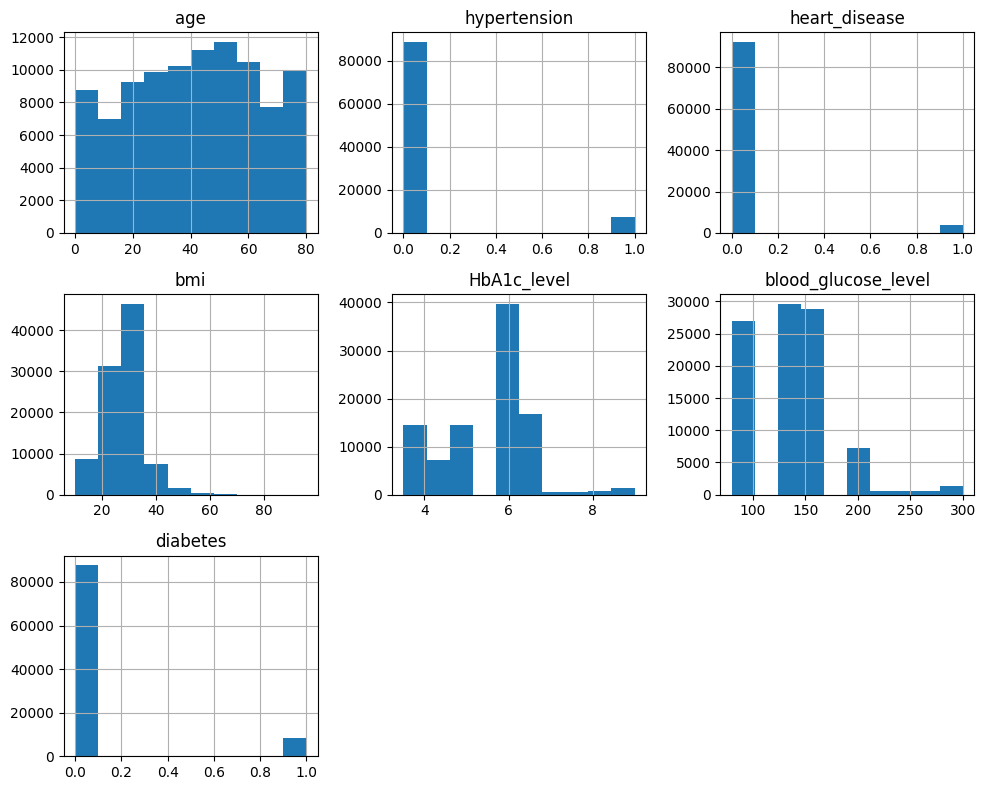

In [ ]:
# Histogram untuk setiap kolom numerik
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

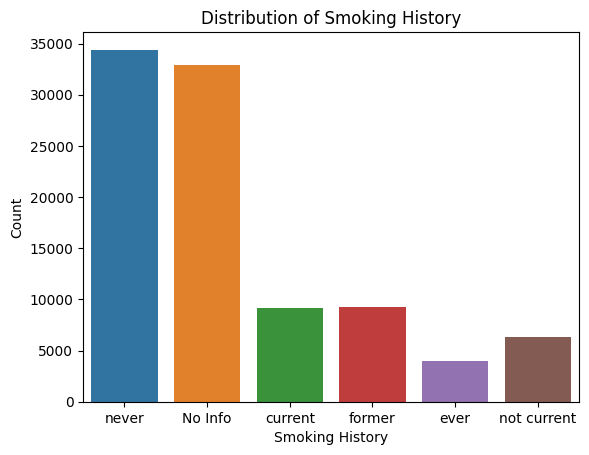

In [ ]:
# Analisis frekuensi variabel 'smoking_history'
sns.countplot(x='smoking_history', data=df)
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Distribution of Smoking History')
plt.show()

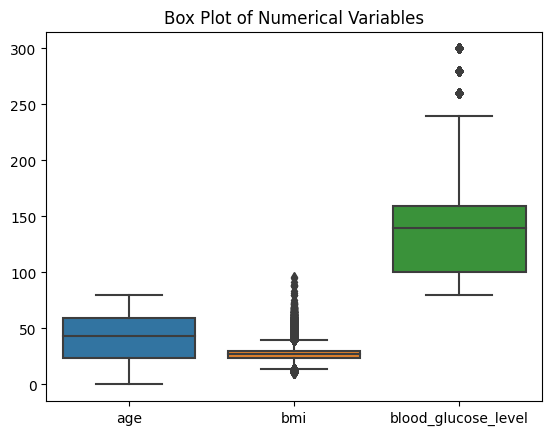

In [ ]:
# Box plot untuk kolom numerik
sns.boxplot(data=df[['age', 'bmi', 'blood_glucose_level']])
plt.title('Box Plot of Numerical Variables')
plt.show()

## Data Transformation

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

label encoding

In [ ]:
# Mencari kolom dengan data kategorikal
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Melakukan label encoding pada data kategorikal
label_encoder = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(label_encoder.fit_transform)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Inisialisasi model Naive Bayes
model1 = GaussianNB()

start_time = time.time()
# Latih model Naive Bayes
model1.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     26220
           1       0.47      0.65      0.55      2624

    accuracy                           0.90     28844
   macro avg       0.72      0.79      0.75     28844
weighted avg       0.92      0.90      0.91     28844



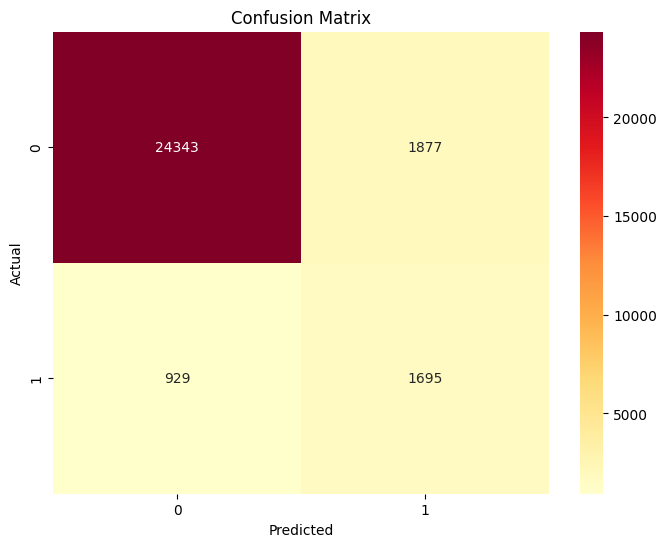

In [ ]:
y_pred = model1.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Accuracy: 0.9027180696158646
Waktu pelatihan: 0.03598642349243164 detik


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Random Forest
model2 = RandomForestClassifier()

start_time = time.time()
# Latih model Random Forest
model2.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26220
           1       0.95      0.67      0.79      2624

    accuracy                           0.97     28844
   macro avg       0.96      0.83      0.89     28844
weighted avg       0.97      0.97      0.96     28844



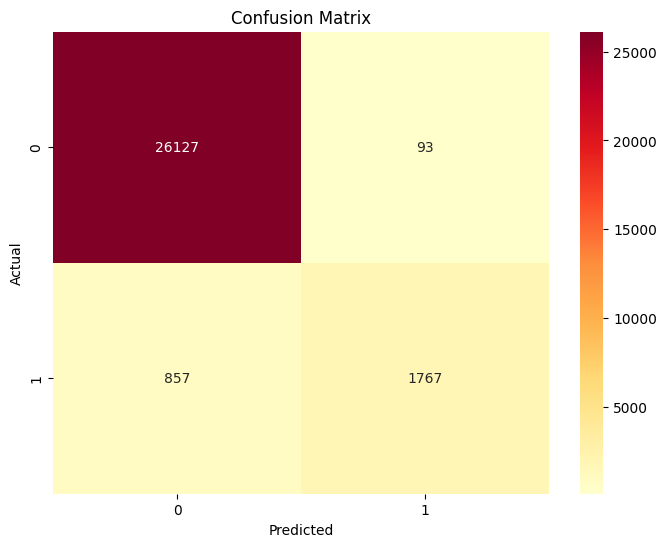

In [ ]:
y_pred = model2.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Accuracy: 0.9670642074608238
Waktu pelatihan: 5.801488876342773 detik


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Inisialisasi model SVM dengan kernel linear
model3 = SVC(kernel='linear')

start_time = time.time()
# Latih model SVM
model3.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26220
           1       0.91      0.58      0.71      2624

    accuracy                           0.96     28844
   macro avg       0.94      0.79      0.84     28844
weighted avg       0.96      0.96      0.95     28844



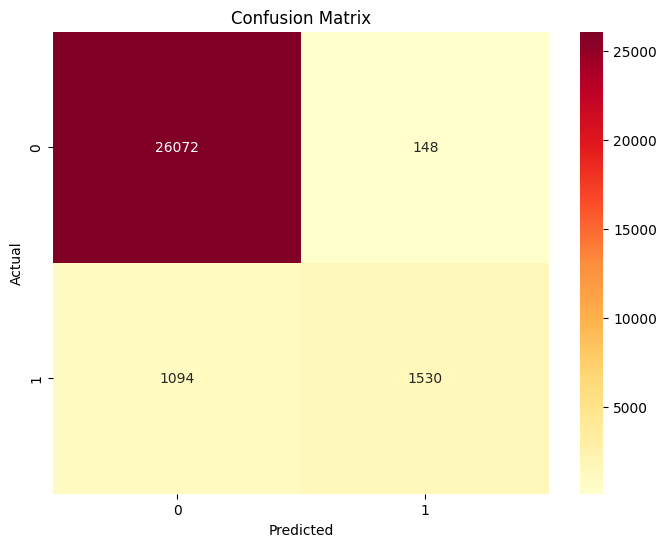

In [ ]:
y_pred = model3.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi SVM:", accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Akurasi SVM: 0.9569407849119401
Waktu pelatihan: 676.5899918079376 detik


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

menentukan jumlah neighbors yang paling optimal

In [ ]:
scores = []

n_neighbors_range = range(1, 10)

# Melakukan validasi silang untuk setiap nilai n_neighbors
for n_neighbors in n_neighbors_range:

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv_scores = cross_val_score(knn, X, y, cv=10)
    avg_score = cv_scores.mean()
    scores.append(avg_score)

for n_neighbors, score in zip(n_neighbors_range, scores):
    print("n_neighbors =", n_neighbors, "| Skor validasi silang =", score)

n_neighbors = 1 | Skor validasi silang = 0.9381669650809332
n_neighbors = 2 | Skor validasi silang = 0.9518336861620919
n_neighbors = 3 | Skor validasi silang = 0.9496911236549316
n_neighbors = 4 | Skor validasi silang = 0.9521145201123211
n_neighbors = 5 | Skor validasi silang = 0.9517504947337482
n_neighbors = 6 | Skor validasi silang = 0.9517816916546019
n_neighbors = 7 | Skor validasi silang = 0.9517400683545544
n_neighbors = 8 | Skor validasi silang = 0.9513136599522645
n_neighbors = 9 | Skor validasi silang = 0.9518648863283428


In [ ]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=4)

start_time = time.time()
# Latih model KNN
knn.fit(X_train, y_train)

end_time = time.time()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26220
           1       0.92      0.47      0.63      2624

    accuracy                           0.95     28844
   macro avg       0.94      0.73      0.80     28844
weighted avg       0.95      0.95      0.94     28844



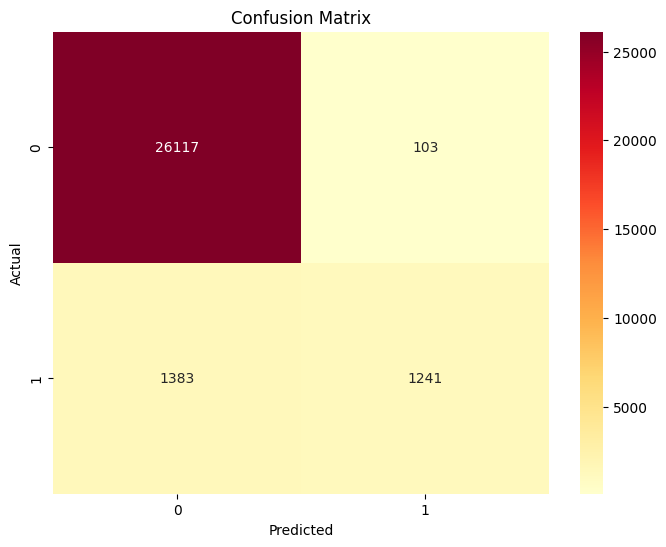

In [ ]:
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi KNN:", accuracy)

training_time = end_time - start_time

print("Waktu pelatihan:", training_time, "detik")

Akurasi KNN: 0.9481694633199279
Waktu pelatihan: 0.12330317497253418 detik


# Kesimpulan setiap model

Total Data yang digunakan: 96146

Data Latih: 70%

Data Uji: 30%


1.  Naive Bayes
>*   Akurasi: 0.9027180696158646
>*   Waktu pelatihan: 0.03598642349243164 detik

2.   Random Forest
>* Akurasi: 0.9670642074608238
>* Waktu pelatihan: 5.801488876342773 detik

3.   Support Vector Machine
>* Akurasi: 0.9569407849119401
>* Waktu pelatihan: 676.5899918079376 detik

4.   K Nearest Neighbors
>* Akurasi: 0.9481694633199279
>* Waktu pelatihan: 0.12330317497253418 detik

Jadi, algoritma yang paling bagus untuk dipakai untuk dataset diabetes adalah Random Forest dengan akurasi paling tinggi dan waktu pelatihan yang sebentar.



